In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_predict, cross_val_score, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
df = pd.read_csv('C:/Users/esmaa/python/Dersler/veri madenciliği/modeleHazir_SayisalVeri.csv')

In [3]:
df.shape

(2154, 83)

In [4]:
df.describe()

,price,room,livingRoom,bathRoom,age,image_count,inAttributes_count,outAttributes_count,locationAttributes_count,inAttributes_count_is_missing,...,is_outlier_price,tier_brand_ratio,tier_is_branded_only,county_brand_ratio,property_type_branded_ratio,direction_encoded,yon_sayisi,yapiDurumu_encoded,yakit_encoded,registerState_encoded
count,2.154000e+03,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,...,2154.000000,2154.000000,2154.0,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000,2154.000000
mean,4.797470e+06,2.813370,1.051068,1.612349,6.267874,27.141133,9.831012,3.512071,5.537604,0.273909,...,0.085887,0.530386,0.0,0.530770,0.531105,0.625812,1.033426,0.841226,3.647168,5.861188
std,5.479788e+06,1.460261,0.456354,0.928296,8.458374,11.807385,7.141152,2.196161,3.281743,0.446066,...,0.280262,0.066438,0.0,0.123669,0.076166,0.969676,0.247226,0.986603,1.074954,1.971169
min,1.900000e+04,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.366906,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.100000e+06,2.000000,1.000000,1.000000,0.000000,19.000000,6.000000,3.000000,4.000000,0.000000,...,0.000000,0.516260,0.0,0.466667,0.547473,0.000000,1.000000,0.000000,4.000000,5.000000
50%,3.100000e+06,3.000000,1.000000,1.000000,4.000000,26.000000,9.000000,3.000000,5.000000,0.000000,...,0.000000,0.568133,0.0,0.574405,0.547473,1.000000,1.000000,0.000000,4.000000,7.000000
75%,5.480000e+06,3.000000,1.000000,2.000000,8.000000,35.000000,11.000000,3.000000,6.000000,1.000000,...,0.000000,0.568133,0.0,0.629797,0.564648,1.000000,1.000000,2.000000,4.000000,7.000000
max,8.500000e+07,24.000000,9.000000,12.000000,40.000000,60.000000,43.000000,21.000000,26.000000,1.000000,...,1.000000,0.568133,0.0,1.000000,0.833333,7.000000,3.000000,2.000000,5.000000,7.000000


In [5]:
print(df.columns)

Index(['price', 'room', 'livingRoom', 'bathRoom', 'age', 'credit', 'barter',
       'furnished', 'roomAndLivingRoom', 'onlineVisit', 'hasBranded',
       'registerState', 'image_count', 'bulunan_yonler', 'property_type',
       'inAttributes_count', 'outAttributes_count', 'locationAttributes_count',
       'inAttributes_count_is_missing', 'outAttributes_count_is_missing',
       'locationAttributes_count_is_missing', 'price_category',
       'fee_is_missing', 'days_since_update', 'Stale_corrected', 'duration',
       'area_name', 'county_name', 'tier', 'distance_to_sakarya_center_km',
       'distance_to_karasu_km', 'distance_to_sapanca_km',
       'distance_to_sakarya_university_km', 'sakarya_center_category',
       'karasu_category', 'sapanca_category', 'sakarya_university_category',
       'floorName', 'floorCount', 'floorNameFloat', 'floorCountFloat',
       'floorRatio', 'usage_name', 'yakit', 'isitma', 'yapiDurumu', 'netSqm',
       'grossSqm', 'sqm_fark', 'residence_name', 'hou

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154 entries, 0 to 2153
Data columns (total 83 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   price                                2154 non-null   int64  
 1   room                                 2154 non-null   int64  
 2   livingRoom                           2154 non-null   int64  
 3   bathRoom                             2154 non-null   int64  
 4   age                                  2154 non-null   int64  
 5   credit                               2154 non-null   bool   
 6   barter                               2154 non-null   bool   
 7   furnished                            2154 non-null   bool   
 8   roomAndLivingRoom                    2154 non-null   object 
 9   onlineVisit                          2154 non-null   bool   
 10  hasBranded                           2154 non-null   bool   
 11  registerState                 

In [7]:
#  property_type ve usageName ve residence_name için label encoding yapılamayacağı için one-hot encoding yapılacak 

# floorName verileri (1. kat, kot 2 vb.) floorNameFloat sütununda sayısal verilere dönüştürüldü
# bulunan_yonler için yon_sayisi ve direction_encoded
# yapiDurumu için yapiDurumu_encoded
# yakit ve isitma arasından yakit sütununa label encoding uyguladık; yakit için yakit_encoded
# registerState için registerState_encoded

df = df.drop(columns = ['roomAndLivingRoom', 'price_category', 'price_category', 'area_name', 'county_name', 
                        'sakarya_center_category', 'karasu_category', 'sapanca_category', 'sakarya_university_category', 
                        
                        'floorName', 'residence_name', 'usage_name', 'yakit', 'isitma', 'bulunan_yonler', 
                        'property_type', 'yapiDurumu', 'registerState'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154 entries, 0 to 2153
Data columns (total 66 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   price                                2154 non-null   int64  
 1   room                                 2154 non-null   int64  
 2   livingRoom                           2154 non-null   int64  
 3   bathRoom                             2154 non-null   int64  
 4   age                                  2154 non-null   int64  
 5   credit                               2154 non-null   bool   
 6   barter                               2154 non-null   bool   
 7   furnished                            2154 non-null   bool   
 8   onlineVisit                          2154 non-null   bool   
 9   hasBranded                           2154 non-null   bool   
 10  image_count                          2154 non-null   int64  
 11  inAttributes_count            

#### floorNameFloat ve floorRatio sütunları null değerlere sahip, doldurulmalı

In [10]:
df['floorNameFloat'].unique()

array([ 2.,  0.,  3., nan,  1.,  5.,  4., -4., -3., -1., -2.])

In [11]:
# null değerlere en kötü encoding değerini atadık
# belki veriyi manipüle etmektir ancak bilgi verilmemesi daha kötü bir durum diye düşünerekten böyle bir tercih yapabiliriz
df['floorNameFloat'] = df['floorNameFloat'].fillna(-5)

In [12]:
df['floorCount'].unique()

array([  4.,   3.,   2.,   1.,   5.,   8.,  10.,  11., 314.])

In [13]:
df['floorRatio'].unique()

array([ 0.5       ,  0.66666667,  0.        ,  1.        ,         nan,
        0.33333333,  1.33333333,  0.75      ,  0.4       ,  0.25      ,
        1.5       ,  0.6       , -1.33333333, -1.        ,  0.8       ,
       -0.33333333, -0.75      ,  0.2       ,  1.25      ,  2.        ,
       -0.5       ,  0.3       ,  0.01273885])

In [14]:
# floorCount'ta null değerler vardı sonra biz onların tarla, bahçe gibi verilere ait olduğunu fark edip floorCount'una 0 girdik
# ancak daha sonra aykırı değer olma sebeplerinden dolayı bu satırların hepsi kalktı bu yüzden 0 veya null değer yok 
# bölme işleminde sorun çıkmayacak 
# floorNameFloat null değerleri -5 ile doldurulduğu için yeniden floorRatio hesaplaması ile null değer doldurulması yapılacak
df['floorRatio'] = df['floorNameFloat'] / df['floorCountFloat']

# Model Denemeleri

Açıklanabilirlik ise → LinearRegression veya Ridge ////
Doğruluk ve karmaşık yapıların yakalanması ise → RandomForest veya XGBoost

### K-Fold Cross Validation K= 5 için Lineer Regresyon ve Random Forest Algoritması Denemeleri

In [18]:
# Özellik ve hedef değişkenleri belirle
X = df.drop(columns=['price'])
y = df['price']

# 1. Eğitim ve test kümelerine ayır (örnek: %80 eğitim, %20 test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Model tanımla
model_linearBasic = LinearRegression()

# 3. Eğitim verisi üzerinde K-Fold ile çapraz tahmin
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
y_train_pred = cross_val_predict(model_linearBasic, X_train, y_train, cv=kfold)

# 4. Eğitim verisi üzerindeki K-Fold sonuçları
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("📊 K-Fold Eğitim Verisi Sonuçları:")
print(f"  RMSE: {train_rmse:.2f}")
print(f"  MAE : {train_mae:.2f}")
print(f"  R²  : {train_r2:.4f}")

# 5. Tüm eğitim verisi ile modeli eğit ve test setinde değerlendir
model_linearBasic.fit(X_train, y_train)
y_test_pred = model_linearBasic.predict(X_test)

# 6. Test verisindeki performans
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\n🧪 Test Verisi Sonuçları:")
print(f"  RMSE: {test_rmse:.2f}")
print(f"  MAE : {test_mae:.2f}")
print(f"  R²  : {test_r2:.4f}")


📊 K-Fold Eğitim Verisi Sonuçları:
  RMSE: 3734382.95
  MAE : 1466593.70
  R²  : 0.5177

🧪 Test Verisi Sonuçları:
  RMSE: 3311099.57
  MAE : 1302010.34
  R²  : 0.6814


In [19]:
# Özellik ve hedef değişkenleri belirle
X = df.drop(columns=['price'])
y = df['price']

# 1. Eğitim ve test kümelerine ayır (örnek: %80 eğitim, %20 test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Model tanımla
model_randomBasic = RandomForestRegressor(random_state=42)

# 3. Eğitim verisi üzerinde K-Fold ile çapraz tahmin
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
y_train_pred = cross_val_predict(model_randomBasic, X_train, y_train, cv=kfold)

# 4. Eğitim verisi üzerindeki K-Fold sonuçları
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("📊 K-Fold Eğitim Verisi Sonuçları:")
print(f"  RMSE: {train_rmse:.2f}")
print(f"  MAE : {train_mae:.2f}")
print(f"  R²  : {train_r2:.4f}")

# 5. Tüm eğitim verisi ile modeli eğit ve test setinde değerlendir
model_randomBasic.fit(X_train, y_train)
y_test_pred = model_randomBasic.predict(X_test)

# 6. Test verisindeki performans
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\n🧪 Test Verisi Sonuçları:")
print(f"  RMSE: {test_rmse:.2f}")
print(f"  MAE : {test_mae:.2f}")
print(f"  R²  : {test_r2:.4f}")


📊 K-Fold Eğitim Verisi Sonuçları:
  RMSE: 3278010.22
  MAE : 1090537.36
  R²  : 0.6284

🧪 Test Verisi Sonuçları:
  RMSE: 3256039.23
  MAE : 992393.99
  R²  : 0.6919


### SelectKBest ve Recursive Feature Elimination (RFE) ile Karar Sütununu En Çok Etkileyen Özellik Sütunlarını Belirleme

In [21]:
# Özellik ve hedef değişkenleri belirle
X = df.drop(columns=['price'])  # price tahmin edilecek sütun
y = df['price']

# Eğitim ve test kümelerine ayır (örnek olarak %80 eğitim, %20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SelectKBest ile en iyi 15 özellik (eğitim verisi üzerinden)
kbest_selector = SelectKBest(score_func=f_regression, k=15)
kbest_selector.fit(X_train, y_train)
kbest_features = set(X_train.columns[kbest_selector.get_support()])

# RFE ile en iyi 15 özellik (eğitim verisi üzerinden)
model_for_rfe = LinearRegression()  # RFE içinde kullanılacak model
rfe_selector = RFE(estimator=model_for_rfe, n_features_to_select=15)
rfe_selector.fit(X_train, y_train)
rfe_features = set(X_train.columns[rfe_selector.support_])

# Ortak özelliklerin kesişimini al
common_features = list(kbest_features & rfe_features)

# Ortak özelliklerle X oluştur
X_train_selected = X_train[common_features]
X_test_selected = X_test[common_features]  # Testte de aynı sütunları kullanıyoruz

# K-Fold yapılandırması
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Kullanılacak modeller
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Sonuçları tutmak için sözlük
results = {}

# Her model için K-Fold performans metriklerini hesapla (sadece eğitim seti ile)
for name, model in models.items():
    rmse_scores = np.sqrt(-cross_val_score(model, X_train_selected, y_train, cv=kfold, scoring='neg_mean_squared_error'))
    mae_scores = -cross_val_score(model, X_train_selected, y_train, cv=kfold, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(model, X_train_selected, y_train, cv=kfold, scoring='r2')

    results[name] = {
        "RMSE (CV)": rmse_scores.mean(),
        "MAE (CV)": mae_scores.mean(),
        "R² (CV)": r2_scores.mean()
    }

# Sonuçları DataFrame olarak göster
results_df = pd.DataFrame(results).T.sort_values(by="R² (CV)", ascending=False)
print("\n📊 K-Fold (Eğitim Verisi) Karşılaştırmalı Sonuçlar:")
print(results_df.round(2))

# İsteğe bağlı: Test seti ile final değerlendirme yapılabilir



📊 K-Fold (Eğitim Verisi) Karşılaştırmalı Sonuçlar:
                    RMSE (CV)    MAE (CV)  R² (CV)
Linear Regression  3095744.18  1395644.65     0.67
Random Forest      3403742.22  1328448.74     0.59


### Onlar Güzel Sonuç Vermeyince;
### KORELASYON ile Karar Sütununu En Çok Etkileyen Özellik Sütunlarını Belirleme

In [23]:
# Özellik ve hedef değişkenleri belirle
X = df.drop(columns=['price'])
y = df['price']

# Korelasyon hesapla ve en çok ilişkili 45 özelliği seç
correlation = X.corrwith(y)
top_features = correlation.abs().sort_values(ascending=False).head(45).index.tolist()
X_selected = X[top_features]

# Eğitim ve test verilerine ayır (%20 test önerilir)
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

# Modeli tanımla
model_linearKorelasyon = LinearRegression()

# K-Fold ayarı
kfold = KFold(n_splits=8, shuffle=True, random_state=42)

# Eğitim verisi üzerinde K-Fold ile tahmin yap
y_train_pred = cross_val_predict(model_linearKorelasyon, X_train, y_train, cv=kfold)

# Eğitim metrikleri (K-Fold sonucu)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Modeli eğit ve test verisi üzerinde değerlendir
model_linearKorelasyon.fit(X_train, y_train)
y_test_pred = model_linearKorelasyon.predict(X_test)

# Test metrikleri
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Sonuçları yazdır
print("📊 K-Fold Eğitim Verisi Sonuçları:")
print(f"  RMSE: {train_rmse:.2f}")
print(f"  MAE : {train_mae:.2f}")
print(f"  R²  : {train_r2:.4f}")

print("\n🧪 Test Verisi Sonuçları:")
print(f"  RMSE: {test_rmse:.2f}")
print(f"  MAE : {test_mae:.2f}")
print(f"  R²  : {test_r2:.4f}")


📊 K-Fold Eğitim Verisi Sonuçları:
  RMSE: 3062681.15
  MAE : 1388727.40
  R²  : 0.6756

🧪 Test Verisi Sonuçları:
  RMSE: 3336312.14
  MAE : 1310560.24
  R²  : 0.6765


In [24]:
# 15 ve 7 için 0.6666
# 45 ve 8 için 0.6741 !

In [25]:
# Özellik ve hedef değişkenleri belirle
X = df.drop(columns=['price'])
y = df['price']

# Korelasyon hesapla ve en çok ilişkili 45 özelliği seç
correlation = X.corrwith(y)
top_features = correlation.abs().sort_values(ascending=False).head(45).index.tolist()
X_selected = X[top_features]

# Eğitim ve test verilerine ayır (%20 test önerilir)
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

# Modeli tanımla
model_randomKorelasyon = RandomForestRegressor(random_state=42)

# K-Fold ayarı
kfold = KFold(n_splits=8, shuffle=True, random_state=42)

# Eğitim verisi üzerinde K-Fold ile tahmin yap
y_train_pred = cross_val_predict(model_randomKorelasyon, X_train, y_train, cv=kfold)

# Eğitim metrikleri (K-Fold sonucu)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Modeli eğit ve test verisi üzerinde değerlendir
model_randomKorelasyon.fit(X_train, y_train)
y_test_pred = model_randomKorelasyon.predict(X_test)

# Test metrikleri
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Sonuçları yazdır
print("📊 K-Fold Eğitim Verisi Sonuçları:")
print(f"  RMSE: {train_rmse:.2f}")
print(f"  MAE : {train_mae:.2f}")
print(f"  R²  : {train_r2:.4f}")

print("\n🧪 Test Verisi Sonuçları:")
print(f"  RMSE: {test_rmse:.2f}")
print(f"  MAE : {test_mae:.2f}")
print(f"  R²  : {test_r2:.4f}")


📊 K-Fold Eğitim Verisi Sonuçları:
  RMSE: 3216672.88
  MAE : 1109254.02
  R²  : 0.6421

🧪 Test Verisi Sonuçları:
  RMSE: 3184410.10
  MAE : 1012029.65
  R²  : 0.7053


In [26]:
# 15 ve 7 için 0.6443 !
# 45 ve 8 için 0.6441

## Aykırı Değer Temizliği

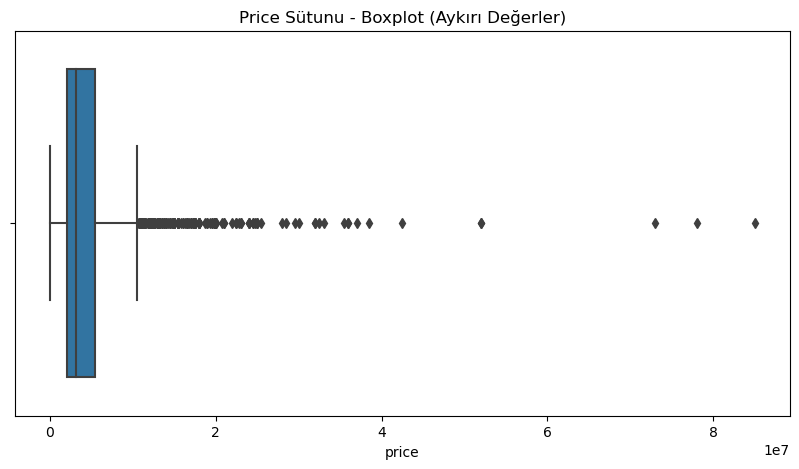

Aykırı değer sayısı: 35

Aykırı Değerler:
        price
37   28500000
222  28000000
239  24000000
250  35500000
339  52000000


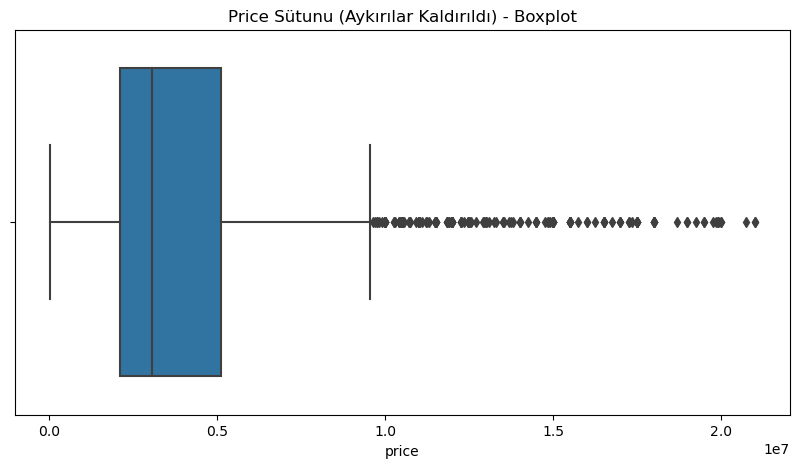


Veri seti satır sayısı - Orijinal: 2154, Temizlenmiş: 2119


In [28]:
# 1. Aykırı Değerleri Görselleştir
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='price')
plt.title("Price Sütunu - Boxplot (Aykırı Değerler)")
plt.show()

# 2. Z-score yöntemiyle aykırı değerleri tespit et
df['price_z'] = zscore(df['price'])

# 3. Aykırı değerleri filtrele
price_outliers = df[(df['price_z'].abs() > 3)]
print(f"Aykırı değer sayısı: {len(price_outliers)}")
print("\nAykırı Değerler:")
print(price_outliers[['price']].head())

# 4. Aykırı değerleri kaldır
df_clean = df[df['price_z'].abs() <= 3].copy()

# 5. Z-score sütununu kaldır
df_clean.drop(columns=['price_z'], inplace=True)

# 6. Temizlenmiş veride yeniden boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_clean, x='price')
plt.title("Price Sütunu (Aykırılar Kaldırıldı) - Boxplot")
plt.show()

# 7. Özet
print(f"\nVeri seti satır sayısı - Orijinal: {len(df)}, Temizlenmiş: {len(df_clean)}")


### Korelasyon ile Devam;

In [30]:
# Özellik ve hedef değişkenleri belirle
X = df_clean.drop(columns=['price'])
y = df_clean['price']

# Eğitim ve test verisine ayır (%80 eğitim, %20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Korelasyonları eğitim seti üzerinden hesapla
correlation = X_train.corrwith(y_train)

# En yüksek korelasyona sahip 35 özelliği seç
top_features = correlation.abs().sort_values(ascending=False).head(35).index.tolist()

# Seçilen özelliklerle yeni X'ler oluştur
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Model tanımı
model_temizLinearKor = LinearRegression()

# K-Fold ayarları
kfold = KFold(n_splits=8, shuffle=True, random_state=42)

# Eğitim verisinde K-Fold çapraz doğrulama ile tahmin yap
y_train_pred_cv = cross_val_predict(model_temizLinearKor, X_train_selected, y_train, cv=kfold)

# Eğitim verisi üzerinden metrikleri hesapla (CV tahminleriyle)
rmse_cv = np.sqrt(mean_squared_error(y_train, y_train_pred_cv))
mae_cv = mean_absolute_error(y_train, y_train_pred_cv)
r2_cv = r2_score(y_train, y_train_pred_cv)

# Modeli eğit ve test verisinde tahmin yap
model_temizLinearKor.fit(X_train_selected, y_train)
y_test_pred = model_temizLinearKor.predict(X_test_selected)

# Test verisi üzerindeki metrikler
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Sonuçları yazdır
print("📊 K-Fold (Eğitim) Performansı:")
print(f"RMSE (CV): {rmse_cv:.2f}")
print(f"MAE  (CV): {mae_cv:.2f}")
print(f"R²   (CV): {r2_cv:.4f}")

print("\n🧪 Test Verisi Performansı:")
print(f"RMSE (Test): {rmse_test:.2f}")
print(f"MAE  (Test): {mae_test:.2f}")
print(f"R²   (Test): {r2_test:.4f}")


📊 K-Fold (Eğitim) Performansı:
RMSE (CV): 1356639.74
MAE  (CV): 931635.03
R²   (CV): 0.8449

🧪 Test Verisi Performansı:
RMSE (Test): 1398663.83
MAE  (Test): 925047.10
R²   (Test): 0.8468


In [31]:
# 35 ve 8 için 0.8490 !
# 20 ve 7 için 0.8456 
# 40 ve 8 için 0.8487 
# 15 ve 7 için 0.8418
# 45 ve 8 için 0.5999

In [32]:
# Özellik ve hedef değişkenleri belirle
X = df_clean.drop(columns=['price'])
y = df_clean['price']

# Eğitim ve test verisine ayır (%80 eğitim, %20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Korelasyonları eğitim seti üzerinden hesapla
correlation = X_train.corrwith(y_train)

# En yüksek korelasyona sahip 35 özelliği seç
top_features = correlation.abs().sort_values(ascending=False).head(35).index.tolist()

# Seçilen özelliklerle yeni X'ler oluştur
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Model tanımı
model_temizRandomKor = RandomForestRegressor(random_state=42)

# K-Fold ayarları
kfold = KFold(n_splits=8, shuffle=True, random_state=42)

# Eğitim verisinde K-Fold çapraz doğrulama ile tahmin yap
y_train_pred_cv = cross_val_predict(model_temizRandomKor, X_train_selected, y_train, cv=kfold)

# Eğitim verisi üzerinden metrikleri hesapla (CV tahminleriyle)
rmse_cv = np.sqrt(mean_squared_error(y_train, y_train_pred_cv))
mae_cv = mean_absolute_error(y_train, y_train_pred_cv)
r2_cv = r2_score(y_train, y_train_pred_cv)

# Modeli eğit ve test verisinde tahmin yap
model_temizRandomKor.fit(X_train_selected, y_train)
y_test_pred = model_temizRandomKor.predict(X_test_selected)

# Test verisi üzerindeki metrikler
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Sonuçları yazdır
print("📊 K-Fold (Eğitim) Performansı:")
print(f"RMSE (CV): {rmse_cv:.2f}")
print(f"MAE  (CV): {mae_cv:.2f}")
print(f"R²   (CV): {r2_cv:.4f}")

print("\n🧪 Test Verisi Performansı:")
print(f"RMSE (Test): {rmse_test:.2f}")
print(f"MAE  (Test): {mae_test:.2f}")
print(f"R²   (Test): {r2_test:.4f}")


📊 K-Fold (Eğitim) Performansı:
RMSE (CV): 1204322.43
MAE  (CV): 776439.74
R²   (CV): 0.8778

🧪 Test Verisi Performansı:
RMSE (Test): 1329622.23
MAE  (Test): 781680.81
R²   (Test): 0.8615


In [33]:
# 15 ve 7 için 0.8743
# 35 ve 8 için 0.8782
# 20 ve 7 için 0.8785
# 40 ve 8 için 0.8793
# 50 ve 8 için 0.8796
# 45 ve 8 için 0.8811 !

In [34]:
# price dışındaki sütunlar (özellikler) X olacak
X = df_clean.drop(columns=['price'])

# Korelasyon matrisini hesapla
corr_matrix = X.corr().abs()

# Kare matris haline getir
distance_matrix = 1 - corr_matrix


In [35]:
print(corr_matrix.isnull().sum().sort_values(ascending=False).head(10))


tier_is_branded_only           65
room                            1
rental_amount                   1
tier_brand_ratio                1
county_brand_ratio              1
property_type_branded_ratio     1
direction_encoded               1
yon_sayisi                      1
yapiDurumu_encoded              1
yakit_encoded                   1
dtype: int64


In [36]:
# Sabit sütunları bul (tüm değerleri aynı olanlar)
constant_columns = [col for col in X.columns if X[col].nunique() <= 1]

# Bu sütunları X'ten çıkar
X = X.drop(columns=constant_columns)

# Korelasyon hesaplamasında sabit sütunlar (tüm değerleri aynı olanlar) NaN üretir.

In [37]:
scaler = StandardScaler()

corr_matrix = X.corr().abs()
distance_matrix = 1 - corr_matrix
distance_scaled = scaler.fit_transform(distance_matrix)

In [38]:
# Standardize et (KMeans daha sağlıklı çalışsın diye)
scaler = StandardScaler()
distance_scaled = scaler.fit_transform(distance_matrix)

# Küme sayısı belirle (örnek: 10 küme)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(distance_scaled)

# Her sütun hangi kümeye ait
cluster_labels = kmeans.labels_
cluster_map = pd.DataFrame({'feature': X.columns, 'cluster': cluster_labels})

# Her kümeden bir tane temsilci seç
selected_features = cluster_map.groupby('cluster')['feature'].first().tolist()

print(f"Seçilen {len(selected_features)} özellik:")
print(selected_features)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Seçilen 3 özellik:
['age', 'credit', 'room']


In [39]:
# X ve y tanımla
X_cluster_selected = df_clean[selected_features]
y = df_clean['price']

# Model ve K-Fold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()
kfold = KFold(n_splits=7, shuffle=True, random_state=42)

# Tahmin
y_pred = cross_val_predict(model, X_cluster_selected, y, cv=kfold)

# Metrikler
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Sonuçlar
print(f"\n[Clustering Feature Selection]")
print(f"K-Fold RMSE: {rmse:.2f}")
print(f"K-Fold MAE: {mae:.2f}")
print(f"K-Fold R² Skoru: {r2:.4f}")



[Clustering Feature Selection]
K-Fold RMSE: 2895556.47
K-Fold MAE: 1711819.63
K-Fold R² Skoru: 0.3043


In [40]:

# Korelasyon matrisi üzerinden distance hesapla
corr_matrix = X.corr().abs()
distance_matrix = 1 - corr_matrix

# Sabit sütunları çıkar
constant_columns = [col for col in X.columns if X[col].nunique() <= 1]
X = X.drop(columns=constant_columns)

# scaler'ı tanımla
scaler = StandardScaler()

# Standardizasyon işlemi
distance_scaled = scaler.fit_transform(distance_matrix)

# Küme sayısı belirle (örnek: 10 küme)
n_clusters = 40
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(distance_scaled)

# Her sütun hangi kümeye ait
cluster_labels = kmeans.labels_
cluster_map = pd.DataFrame({'feature': X.columns, 'cluster': cluster_labels})

# Her kümeden bir tane temsilci seç
selected_features = cluster_map.groupby('cluster')['feature'].first().tolist()

print(f"Seçilen {len(selected_features)} özellik:")
print(selected_features)


# X ve y tanımla
X_cluster_selected = df_clean[selected_features]
y = df_clean['price']

# Model ve K-Fold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()
kfold = KFold(n_splits=7, shuffle=True, random_state=42)

# Tahmin
y_pred = cross_val_predict(model, X_cluster_selected, y, cv=kfold)

# Metrikler
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Sonuçlar
print(f"\n[Clustering Feature Selection]")
print(f"K-Fold RMSE: {rmse:.2f}")
print(f"K-Fold MAE: {mae:.2f}")
print(f"K-Fold R² Skoru: {r2:.4f}")


D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Seçilen 40 özellik:
['image_count', 'distance_to_sakarya_center_km', 'tier', 'livingRoom', 'usage_Boş', 'yakit_encoded', 'inAttributes_count', 'room', 'floorCount', 'inAttributes_count_is_missing', 'furnished', 'is_outlier_price', 'days_since_update', 'residence_Ara Kat Dubleks', 'property_Bungalov', 'residence_Ters Dubleks', 'direction_encoded', 'property_Prefabrik', 'property_Köy Evi', 'property_Köşk', 'residence_Çatı Dubleksi', 'property_Yazlık', 'residence_İkiz Ev', 'housingComplex_cleaned', 'residence_Bahçe Katı', 'floorNameFloat', 'credit', 'residence_Bahçe Dubleksi', 'age', 'property_Çiftlik Evi', 'duration', 'residence_Dubleks', 'property_type_branded_ratio', 'rental_amount', 'distance_to_karasu_km', 'hasBranded', 'fee_is_missing', 'onlineVisit', 'property_Müstakil Ev', 'usage_Kiracılı']

[Clustering Feature Selection]
K-Fold RMSE: 3138399.44
K-Fold MAE: 1097812.10
K-Fold R² Skoru: 0.1827


In [115]:
# Özellik ve hedef değişkenler
X = df_clean.drop(columns=['price'])
y = df_clean['price']

# Veriyi eğitim ve test olarak ayır (%80 - %20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Korelasyon hesapla (sadece eğitim seti üzerinden)
correlation = X_train.corrwith(y_train)
top_features = correlation.abs().sort_values(ascending=False).head(45).index.tolist()

# Seçilen özelliklerle X'leri oluştur
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Parametre grid'i
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

# Model ve GridSearchCV
rf = RandomForestRegressor(random_state=42)
kfold = KFold(n_splits=8, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=kfold,
                           scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

# En iyi modeli al
best_model_grid = grid_search.best_estimator_

# Eğitim verisinde çapraz doğrulama ile değerlendirme (cross_val_predict)
y_train_pred_cv = cross_val_predict(best_model_grid, X_train_selected, y_train, cv=kfold)

# Eğitim seti (CV) metrikleri
rmse_cv = np.sqrt(mean_squared_error(y_train, y_train_pred_cv))
mae_cv = mean_absolute_error(y_train, y_train_pred_cv)
r2_cv = r2_score(y_train, y_train_pred_cv)

# Test verisinde tahmin yap
y_test_pred = best_model_grid.predict(X_test_selected)

# Test seti metrikleri
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Sonuçlar
print("🔧 En iyi parametreler:", grid_search.best_params_)
print("\n📊 Eğitim Verisi (K-Fold CV) Performansı:")
print(f"RMSE (CV): {rmse_cv:.2f}")
print(f"MAE  (CV): {mae_cv:.2f}")
print(f"R²   (CV): {r2_cv:.4f}")

print("\n🧪 Test Verisi Performansı:")
print(f"RMSE (Test): {rmse_test:.2f}")
print(f"MAE  (Test): {mae_test:.2f}")
print(f"R²   (Test): {r2_test:.4f}")


🔧 En iyi parametreler: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}

📊 Eğitim Verisi (K-Fold CV) Performansı:
RMSE (CV): 1176248.39
MAE  (CV): 765542.00
R²   (CV): 0.8834

🧪 Test Verisi Performansı:
RMSE (Test): 1291234.29
MAE  (Test): 763429.79
R²   (Test): 0.8694


In [42]:
# 45 ve 8 için 0.8813 !
# 20 ve 7 için 0.8798
# 40 ve 8 için 0.8794
# 15 ve 7 için 0.8746

## Eğitim-Test Kümelerinden Eğitimde K Cross Validation + RandomSearch Optimizasyon (Random Forest)

In [44]:
# Özellik ve hedef değişkenleri
y = df_clean['price']
X = df_clean.drop(columns=['price'])

# En etkili 15 özelliği korelasyon ile seç (tüm veri yerine sadece eğitim setinde hesaplanacak şekilde aşağıda güncellenecek)
X_temp_train, X_temp_test, y_temp_train, y_temp_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Korelasyon sadece eğitim seti üzerinde hesaplanır
correlation = X_temp_train.corrwith(y_temp_train)
top_features = correlation.abs().sort_values(ascending=False).head(15).index.tolist()

# Seçilen özelliklere göre veri setlerini oluştur
X_train = X_temp_train[top_features]
X_test = X_temp_test[top_features]
y_train = y_temp_train
y_test = y_temp_test

# 🔍 RandomizedSearch parametre aralıkları
param_dist = {
    'n_estimators': np.arange(100, 300, 50),
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Model
rf = RandomForestRegressor(random_state=42)

# K-Fold yalnızca eğitim setinde
kfold = KFold(n_splits=7, shuffle=True, random_state=42)

# RandomizedSearchCV ile hiperparametre optimizasyonu
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=kfold,
    random_state=42,
    n_jobs=-1
)

# 🔧 Eğitim verisinde modeli eğit
random_search.fit(X_train, y_train)

# ✅ En iyi modeli al
best_model_random = random_search.best_estimator_

# 📊 Eğitim verisi üzerinde cross_val_predict ile tahmin
y_train_pred_cv = cross_val_predict(best_model_random, X_train, y_train, cv=kfold)

# 🎯 Eğitim seti (CV) metrikleri
rmse_cv = np.sqrt(mean_squared_error(y_train, y_train_pred_cv))
mae_cv = mean_absolute_error(y_train, y_train_pred_cv)
r2_cv = r2_score(y_train, y_train_pred_cv)

# 📊 Test seti üzerinde tahmin
y_test_pred = best_model_random.predict(X_test)

# 🎯 Test seti metrikleri
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# 📢 Sonuçları yazdır
print("🔧 En iyi parametreler:", random_search.best_params_)

print("\n📊 Eğitim Verisi (K-Fold CV) Performansı:")
print(f"RMSE (CV): {rmse_cv:.2f}")
print(f"MAE  (CV): {mae_cv:.2f}")
print(f"R²   (CV): {r2_cv:.4f}")

print("\n🧪 Test Verisi Performansı:")
print(f"RMSE (Test): {rmse_test:.2f}")
print(f"MAE  (Test): {mae_test:.2f}")
print(f"R²   (Test): {r2_test:.4f}")

print("Seçilen en etkili 15 özellik:")
print(top_features)

🔧 En iyi parametreler: {'n_estimators': 250, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}

📊 Eğitim Verisi (K-Fold CV) Performansı:
RMSE (CV): 1194391.52
MAE  (CV): 785987.44
R²   (CV): 0.8798

🧪 Test Verisi Performansı:
RMSE (Test): 1331785.01
MAE  (Test): 794093.29
R²   (Test): 0.8611
Seçilen en etkili 15 özellik:
['is_outlier_price', 'grossSqm', 'netSqm', 'property_Daire', 'property_Villa', 'room', 'sqm_fark', 'bathRoom', 'tier_brand_ratio', 'county_brand_ratio', 'distance_to_karasu_km', 'distance_to_sapanca_km', 'floorRatio', 'floorNameFloat', 'image_count']


In [45]:
# 35 ve 8 için 0.8814
# 40 ve 8 için 0.8821
# 15 ve 7 için 0.8826 !